# Power spectrum analysis, all the rats 

In [1]:
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import pyqtgraph as pg
from pyqtgraph.Qt import QtCore, QtGui
from sklearn.linear_model import LinearRegression
import numpy as np
import os,sys
from statsmodels.regression import linear_model as sm
import statsmodels.api as sm2
%matplotlib inline
import matplotlib.cm as cm
cmap = cm.tab10
import random
from scipy import signal
import cmath
import itertools
import seaborn as sns
import matplotlib.pyplot as plt
import pyqtgraph as pg
from pyqtgraph.Qt import QtCore, QtGui
from sklearn.linear_model import LinearRegression
import numpy as np
import os,sys
from statsmodels.regression import linear_model as sm
import statsmodels.api as sm2
%matplotlib inline
import matplotlib.cm as cm
cmap = cm.tab10
import random
from scipy import signal
import cmath
%load_ext autoreload
%autoreload 2
from scipy.signal import firwin, lfilter, filtfilt
import random
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import MultipleLocator
from mpl_toolkits.mplot3d.art3d import Line3DCollection
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib.path import Path
from matplotlib import patches
from matplotlib.lines import Line2D
from matplotlib.legend_handler import HandlerLineCollection
import numpy as np
# questo lo usi se vuoi definire qualche colormap personalizzata, questa per esempio
# va dal blu all'arancione
colorss = ["navy", "royalblue", "cornflowerblue", "lightsalmon", "coral", "orangered", "firebrick"]
nodes = [0.0, 1/6, 1/3, 1/2, 2/3, 5/6, 1]
my_cmap = LinearSegmentedColormap.from_list("my_cmap", list(zip(nodes, colorss)))

class MidpointNormalize(matplotlib.colors.Normalize):
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        matplotlib.colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))
import matplotlib.colors as colors
from mpl_toolkits.axes_grid1 import make_axes_locatable
from matplotlib.ticker import MultipleLocator


colors = ["navy", "royalblue", "cornflowerblue", "lightsalmon", "coral", "orangered", "firebrick"]
nodes = [0.0, 1/6, 1/3, 1/2, 2/3, 5/6, 1]
my_cmap = LinearSegmentedColormap.from_list("my_cmap", list(zip(nodes, colors)))

/home/benny/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
plt.rcParams['axes.labelsize'] = 25
plt.rcParams['axes.titlesize'] = 30
plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Computer Modern'
plt.rcParams['text.usetex'] = True

In [3]:
plt.rcParams['font.size'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['axes.titlesize'] = 20

In [4]:
cd '/home/benny/Desktop/Github/Criticality-in-barrel-cortex'

/home/benny/Desktop/Github/Criticality-in-barrel-cortex


In [5]:
from valanghe import *
%load_ext autoreload
%autoreload 2
from modules_plotting import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
cd '/home/benny/Desktop/Github/Oscillations analysis'

/home/benny/Desktop/Github/Oscillations analysis


In [7]:
def R_helper_detector(_input):
    maxima=[]
    for i in range(1, len(_input)-1):
        if (_input[i-1] < _input[i] and _input[i] > _input[i+1]) and _input[i] > 0 : 
                maxima.append([i, _input[i]])
    maxima = np.array(maxima)
    return(maxima)
           


def plot_maxima(R_peaks, filtered_signal):
    fig_M, ax_M = plt.subplots(1, 1, figsize=(8,6))
    fig_M.suptitle("Maxima Visualization", size = 'x-large', weight = "bold")
    
    ax_M.set_xlabel("index[n]")
    ax_M.set_ylabel("Amplitude")
    #selected interval to show maxima in the plot
    bound2 = [100000,102000]
    
    currM = R_peaks[R_peaks[:,0]<bound2[1], :]
    currM = currM[currM[:,0]>bound2[0], :]
    
    ax_M.scatter(range(bound2[0], bound2[1]), filtered_signal[bound2[0]:bound2[1]], s=1)
    ax_M.scatter(currM[:,0], currM[:,1], s=9, c='red')

In [8]:
def trendcorrel(a, shape1,shape2,ax, label = 'Correlation'):
   
    coordinate = []
    for i in range(shape1):
        for j in range(shape2):
            coordinate.append([i, j])

    correlations = []
    coord = []


    for i in range(shape1*shape2):
        for j in range(i + 1):

            dist = np.sqrt((coordinate[i][0] - coordinate[j][0])**2 + (coordinate[i][1] - coordinate[j][1])**2)
            correlations.append([round(dist,1), a[i][j]])

    correlations = np.asarray(correlations)

    numdist = np.sort(np.unique(correlations[:,0]))
    correlations2 = [[] for i in range(len(numdist))]

    for i in range(len(numdist)):
        for z in range(len(correlations)):
            if correlations[z,0] == numdist[i]:
                correlations2[i].append(correlations[z,1])     

    correlations2 = np.asarray(correlations2)

    medie = []
    std = []
    
    for i in range(len(correlations2)):
        medie.append(np.mean(correlations2[i]))
        std.append(np.std(correlations2[i], ddof = 1)/np.sqrt(len(correlations2[i])))
  
    #changesign1 = np.where(np.sign(medie[:-1]) !=np.sign(medie[1:]), True,False).reshape(-1,)
    #changesign1 =np.hstack((changesign1, False))
    #x = numdist[changesign1][0]
    #cr= medie[numdist.tolist().index(x)]
    #plt.plot([x for i in range(10)],np.linspace(-0.5,1,10),'r-')
    #plt.plot(np.linspace(0,max(numdist),10),[cr for i in range(10)],'r-')
    #print('The correlation length is:', x)
    ax.set_ylabel(label)
    ax.set_xlabel(r'Distance between sites [\# of sites]')
    ax.errorbar(numdist, medie, yerr = std, fmt = 'r-', ecolor = 'orange', barsabove = False, capsize = 3)
  

In [66]:
def meanphasecoherence(sig, id1,id2, normalize = False):
    """
    sig is the matrix of data already hilbert transformed and made of complex numbers
    """
    n1 = sig[:,id1]/np.abs(sig[:,id1])
    n2 = sig[:,id2]/np.abs(sig[:,id2])
    op = n1*np.conjugate(n2)
    s= np.mean(op)
    sincr = np.abs(s)
    return sincr

In [9]:
def PhaseLock(sample, nunits = "default", time = "default"):
    """
    sample.shape = time x trials
    """
    sig = signal.hilbert(sample, axis = 0)
    norm = sig/np.abs(sig)
    summ = np.mean(norm, axis = 1)
    sincr = np.abs(summ)
    return np.mean(sincr),sincr

In [10]:
def my_moving_window(x, window=3, FUN=np.mean):
    """
    Calculates a moving estimate for a signal

    Args:
      x (numpy.ndarray): a vector array of size N
      window (int): size of the window, must be a positive integer
      FUN (function): the function to apply to the samples in the window
    Returns:
      (numpy.ndarray): a vector array of size N, containing the moving
      average of x, calculated with a window of size window
    """
    if len(x.shape) == 2:
        output = np.zeros(x.shape)
        for rown in range(x.shape[0]):
            output[rown, :] = my_moving_window(x[rown, :],window=window,FUN=FUN)                       
        return output
    output = np.zeros(x.size)
    for samp_i in range(x.size):
        values = []
        # loop through the window:
        for wind_i in range(int(1 - window), 1):
            if ((samp_i + wind_i) < 0) or (samp_i + wind_i) > (x.size - 1):
                # out of range
                continue
            # sample is in range and not nan, use it:
            if not(np.isnan(x[samp_i + wind_i])):
                values += [x[samp_i + wind_i]]
        # calculate the mean in the window for this point in the output:
        output[samp_i] = FUN(values)
    return output


In [11]:
cd /home/benny/Desktop/altriDati/20180531_4x64/2s

/home/benny/Desktop/altriDati/20180531_4x64/2s


In [12]:
lista = np.sort(os.listdir())

In [13]:
timeseries =[]
for k in range(20):
    path = lista[k]
    width = 4    #columns
    heigth = 64   #rows
    nframes = 2000  #load  only some frames
    #n_words_to_load = heigth * width  * nframes
    n_words_to_load = -1  #load  all frames 
    raw = np.fromfile( path, dtype=np.double, count = n_words_to_load)  # count = -1 to load all data
    a = np.reshape(raw, (-1, width, heigth))
    a1 = []
    
    for z in range(9764):
        a1.append(np.delete(a[z],(0,1,2,3,4,5,6,7,8), axis = 1).transpose().tolist())
   
    a1 = np.asarray(a1)
    a1 = a1.reshape(-1,220)
    timeseries.append(a1)
    
                      
timeseries = np.array(timeseries)
timeseries[:,:,60] = np.mean(timeseries, axis = 2)

In [237]:
dt = 10/9764
sf = 1/dt

down = 1
up = 100
nyq = 0.5*sf

lowcut =3-2
highcut = 3+2
low = lowcut / nyq
high = highcut / nyq
order = 2
sig = timeseries[:,:,:]
f, h = signal.butter(order,[low, high], btype='bandpass')
filtered = signal.filtfilt(f, h, sig, axis = 1,padlen=150)

In [29]:
dt = 10/9764
sf = 1/dt

down = 1
up = 100
nyq = 0.5*sf

lowcut =7
highcut = 200
low = lowcut / nyq
high = highcut / nyq
order = 2
sig = timeseries[:,:,:]
f, h = signal.butter(order,[low, high], btype='bandpass')
filtered = signal.filtfilt(f, h, sig, axis = 1,padlen=150)

In [167]:
9764* 2.150/10 -1000
peaks =R_helper_detector(filtered[0,1000:3000])

In [46]:
x,Pxx = signal.periodogram(filtered[10,:1000,45],fs = 1/0.001)

(0.0, 20.0)

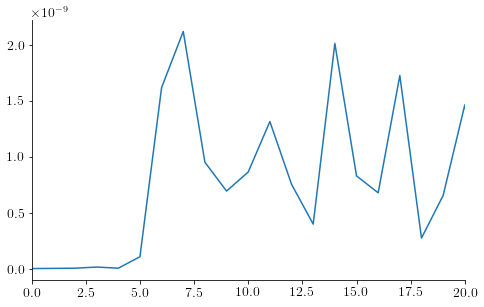

In [47]:
plt.plot(x,Pxx)
plt.xlim(0,20)

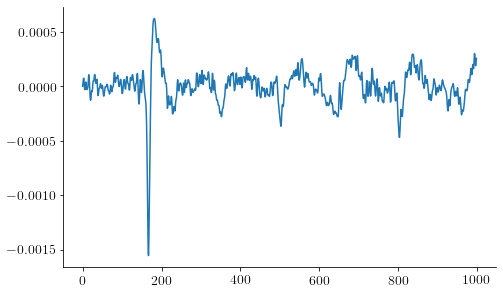

In [45]:
plt.plot(filtered[10,:1000,45])

## Automatizzare questa cosa

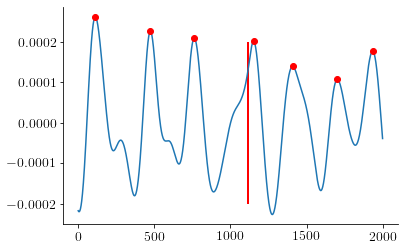

In [168]:
plt.plot(filtered[0,1000:3000])
plt.plot(peaks[:,0],peaks[:,1], 'ro')
plt.plot(sig[1000:3000,80]*10**-1, 'orange')
plt.vlines(1118,-0.0002,0.0002, 'r', lw = 2)
#plt.xlim(1000,1500)


In [179]:
ts = t_s -peaks[:,0][2]
ts, T0

(356.0, 288.0)

In [180]:
t_s = 1118
T0 = peaks[:,0][2] - peaks[:,0][1]
T1 = peaks[:,0][3] - peaks[:,0][2]
phase = (T0 - T1)/T0*2*np.pi
phase_stim = ts/T0*2*np.pi


In [182]:
phasestim = []
phases = []

In [181]:
(phase_stim)%(2*np.pi)

1.4835298641951802

In [184]:
phasestim.append((phase_stim)%(2*np.pi))
phases.append(phase)

## Altro trial

In [185]:
peaks =R_helper_detector(filtered[1,1000:3000])

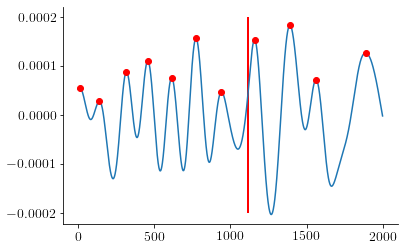

In [186]:
plt.plot(filtered[1,1000:3000])
plt.plot(peaks[:,0],peaks[:,1], 'ro')
plt.plot(sig[1000:3000,80]*10**-1, 'orange')
plt.vlines(1118,-0.0002,0.0002, 'r', lw = 2)
#plt.xlim(1000,1500)


In [201]:
peaks[:,0][6]

941.0

In [217]:
idx = np.where( (t_s- peaks[:,0]) == (t_s- peaks[:,0])[(t_s- peaks[:,0])>0].min())[0][0]
time = peaks[:,0][idx]
time

941.0

In [223]:
ts = t_s - time
phase

-8.164378512921976

In [219]:
t_s = 1118
T0 = peaks[:,0][idx] - peaks[:,0][idx -1]
T1 = peaks[:,0][idx + 1] - peaks[:,0][idx -1]
phase = (T0 - T1)/T0*2*np.pi
phase_stim = ts/T0*2*np.pi


In [220]:
phasestim = []
phases = []

In [221]:
phase_stim ,(phase_stim)%(2*np.pi)

(6.659423948328064, 0.37623864114847816)

In [224]:
phasestim.append((phase_stim)%(2*np.pi))
phases.append(phase% 2* np.pi)

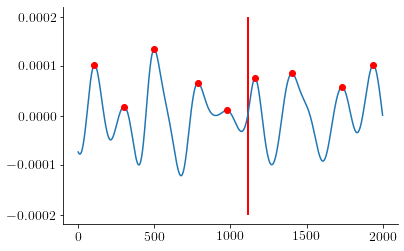

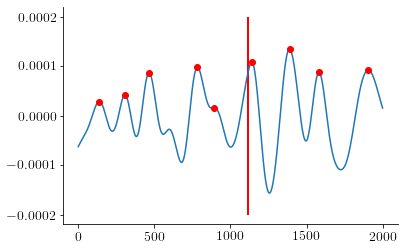

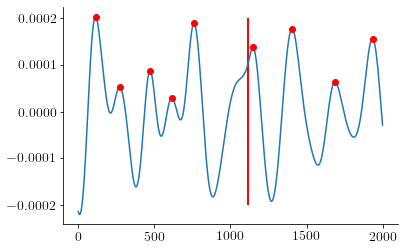

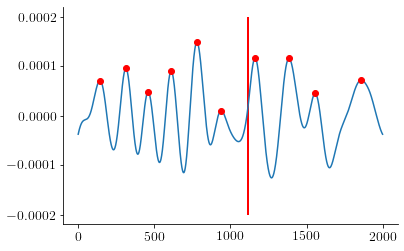

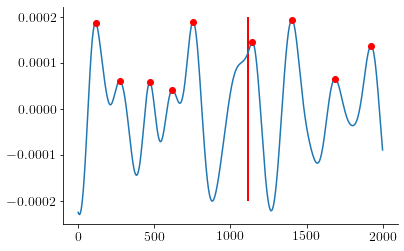

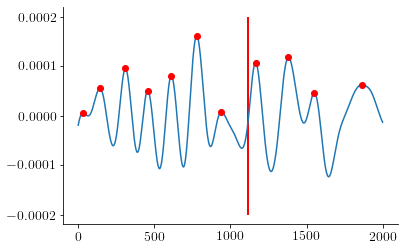

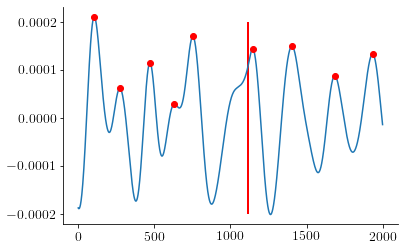

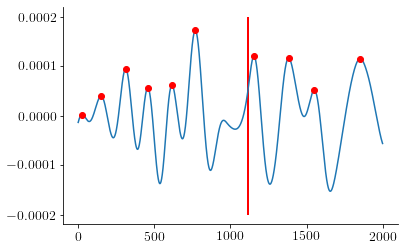

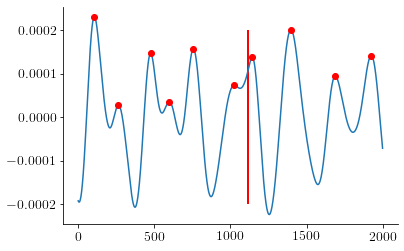

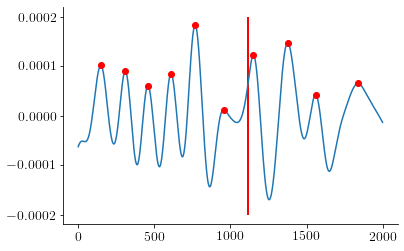

In [246]:
phasestim = []
phases = []
for elect in range(60,65):
    for trial in range(20):
        peaks =R_helper_detector(filtered[trial,1000:3000,elect])
        if trial < 2:
            plt.figure()
            plt.plot(filtered[trial,1000:3000, elect])
            plt.plot(peaks[:,0],peaks[:,1], 'ro')
             #plt.plot(sig[1000:3000,80]*10**-1, 'orange')
            plt.vlines(1118,-0.0002,0.0002, 'r', lw = 2)
            #plt.xlim(1000,1500)

        idx = np.where( (t_s- peaks[:,0]) == (t_s- peaks[:,0])[(t_s- peaks[:,0])>0].min())[0][0]
        time = peaks[:,0][idx]
        ts = t_s - time
        t_s = 1118
        T0 = peaks[:,0][idx] - peaks[:,0][idx -1]
        T1 = peaks[:,0][idx + 1] - peaks[:,0][idx -1]
        phase = (T0 - T1)/T0*2*np.pi
        phase_stim = ts/T0*2*np.pi
        phasestim.append((phase_stim)%(2*np.pi))
        phases.append(phase% 2* np.pi)

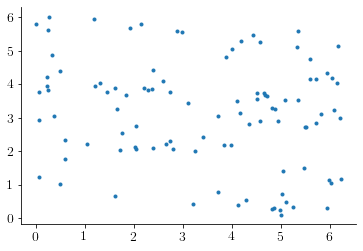

In [247]:
plt.plot(phases,phasestim, '.')

# Power spectrum <a id="powerspectrum"></a>

### EPRs

In [25]:
np.mean(timeseries,0).shape

(9764, 220)

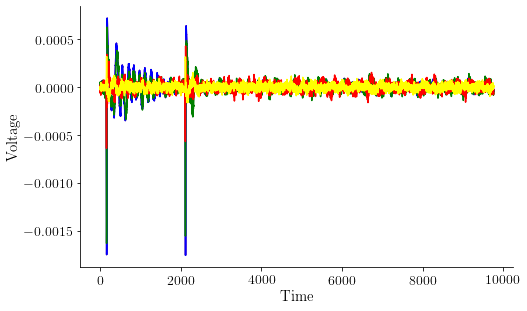

In [26]:
#plt.plot(np.mean(timeseries,0)[:,100], 'purple', lw = 1.5);

plt.plot(np.mean(timeseries,0)[:,61], 'purple', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,61], 'blue', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,131], 'green', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,200], 'red', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,10], 'yellow', lw = 1.5);
plt.ylabel('Voltage')
plt.xlabel('Time');

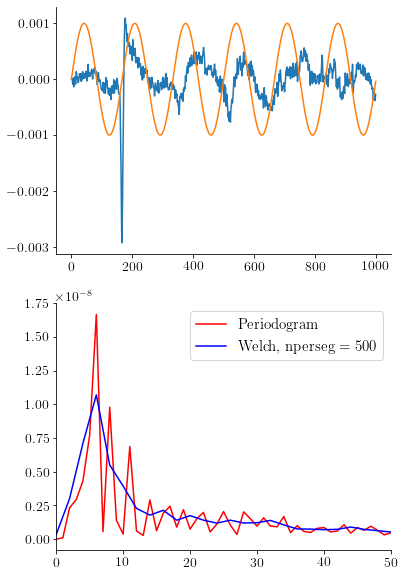

In [27]:
fig = plt.figure(figsize = (6,10))
ax = fig.add_subplot(2,1,1)
sig2 = timeseries[0,:1000,70]

ax.plot(sig2)

x = np.arange(0,1,0.001)
plt.plot(np.sin(x*2*np.pi*6)*10**-3)
sig = np.sin(x*2*np.pi*6)

ax = fig.add_subplot(2,1,2)

x, pxx = signal.periodogram(sig2, fs = 1/0.001)

ax.plot(x,pxx, 'r-',label = 'Periodogram')

x, pxx = signal.welch(sig2, fs = 1/0.001,  nperseg = 500)

ax.plot(x,pxx, 'b-',label = 'Welch, nperseg = 500')
ax.set_xlim(0,50)
ax.legend()


In [28]:
powerStim = []
powerRes = []
xStim = []
freqStim =[]
freqRes = []
for s in range(20):
    for g in range(220):
        xS, pxx = signal.periodogram(timeseries[s,:1000,g], fs = 1/0.001)
        xStim.append(xS)
        peaks = R_helper_detector(pxx)
        sort = np.sort(peaks[:,1])[::-1]
        freqStim.append(xS[pxx.tolist().index(sort[0])])
        powerStim.append(pxx)
        
        xR, pxx = signal.periodogram(timeseries[s,6000:,g], fs = 1/0.001)
        powerRes.append(pxx)
                                                            
        peaks = R_helper_detector(pxx)
        sort = np.sort(peaks[:,1])[::-1]
        freqRes.append(xR[pxx.tolist().index(sort[0])])

In [29]:
freqStim = np.array(freqStim)
freqRes = np.array(freqRes)

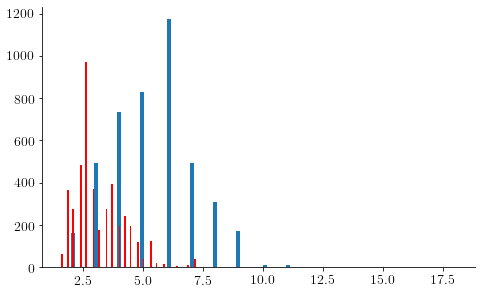

In [30]:
plt.hist(freqStim, bins =100);
plt.hist(freqRes, bins =100, color = 'red');

In [31]:
freqStim.mean(), freqRes.mean()

(5.403181818181818, 3.1804898077480437)

In [32]:
powerStim = np.array(powerStim)
powerRes = np.array(powerRes)


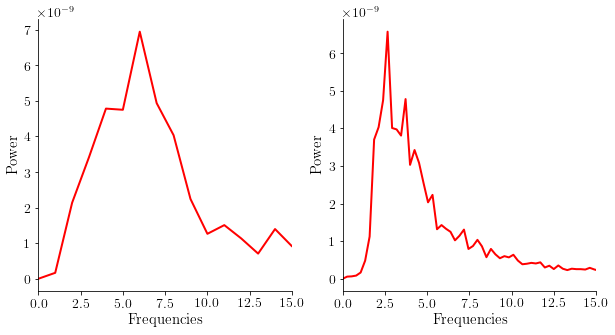

In [33]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,2,1)
ax.plot(xS, np.mean(powerStim,0), 'red', lw = 2)
ax.set_xlim(0,15)
ax.set_ylabel('Power')
ax.set_xlabel('Frequencies');

ax = fig.add_subplot(1,2,2)
ax.plot(xR, np.mean(powerRes,0), 'red', lw = 2)
ax.set_xlim(0,15)
ax.set_ylabel('Power')
ax.set_xlabel('Frequencies');

Four dominant frequencies: 6.0 16.0 26.0 44.0 Hz


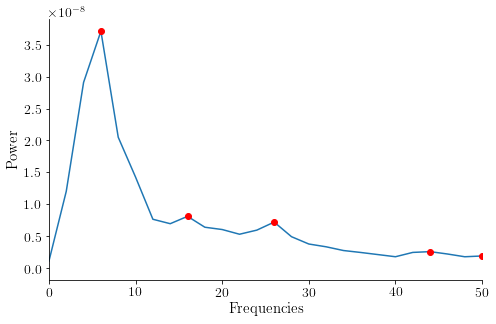

In [34]:
y = timeseries[0,:1000,80]

f, Pxx_den = signal.welch(y, fs = 1/0.001, nperseg = 500,scaling = "spectrum")

peaks = R_helper_detector(Pxx_den)
sort = np.sort(peaks[:,1])[::-1]

print('Four dominant frequencies: %.1f %.1f %.1f %.1f Hz' %(f[Pxx_den.tolist().index(sort[0])],f[Pxx_den.tolist().index(sort[1])],f[Pxx_den.tolist().index(sort[2])],f[Pxx_den.tolist().index(sort[3])]))
plt.plot(f,Pxx_den)
plt.plot(f[np.array(peaks[:,0], dtype = int)], peaks[:,1], 'ro')
plt.xlim(0,50);
plt.xlabel('Hz');
plt.xlabel('Frequencies')
plt.ylabel('Power');

## another rat

In [35]:
cd /home/benny/Desktop/altriDati/20181018_4x64/2s

/home/benny/Desktop/altriDati/20181018_4x64/2s


In [36]:
lista = np.sort(os.listdir())

In [37]:

timeseries =[]
for k in range(20):
    path = lista[k]
    width = 4    #columns
    heigth = 64   #rows
    nframes = 2000  #load  only some frames
    #n_words_to_load = heigth * width  * nframes
    n_words_to_load = -1  #load  all frames 
    raw = np.fromfile( path, dtype=np.double, count = n_words_to_load)  # count = -1 to load all data
    a = np.reshape(raw, (-1, width, heigth))
    a1 = []
    
    for z in range(9764):
        a1.append(np.delete(a[z],(0,1,2,3,4,5,6,7,8), axis = 1).transpose().tolist())
   
    a1 = np.asarray(a1)
    a1 = a1.reshape(-1,220)
    timeseries.append(a1)
    
                      
timeseries = np.array(timeseries)
timeseries[:,:,60] = np.mean(timeseries, axis = 2)

# Power spectrum <a id="powerspectrum"></a>

### EPRs

In [38]:
np.mean(timeseries,0).shape

(9764, 220)

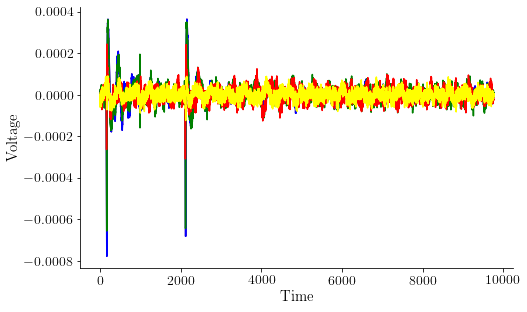

In [39]:
#plt.plot(np.mean(timeseries,0)[:,100], 'purple', lw = 1.5);

plt.plot(np.mean(timeseries,0)[:,61], 'purple', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,61], 'blue', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,131], 'green', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,200], 'red', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,10], 'yellow', lw = 1.5);
plt.ylabel('Voltage')
plt.xlabel('Time');

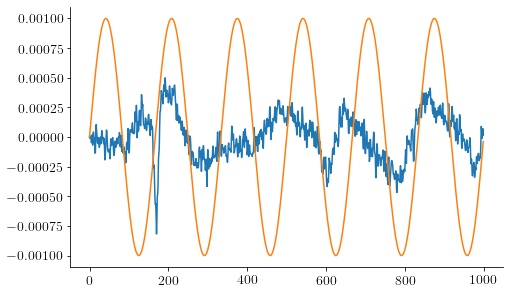

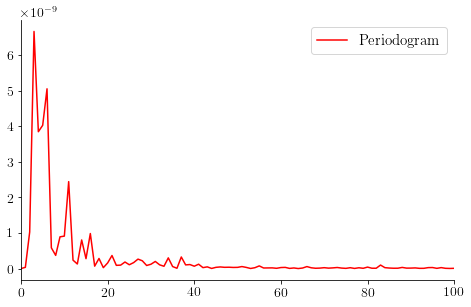

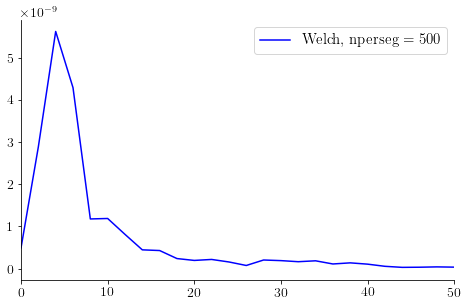

In [40]:
plt.plot(timeseries[0,:1000,70])

x = np.arange(0,1,0.001)
plt.plot(np.sin(x*2*np.pi*6)*10**-3)
sig = np.sin(x*2*np.pi*6)

sig2 = timeseries[0,:1000,70]
x, pxx = signal.periodogram(sig2, fs = 1/0.001)
plt.figure()
plt.plot(x,pxx, 'r-',label = 'Periodogram')

plt.legend()
plt.xlim(0,100)
plt.figure()
x, pxx = signal.welch(sig2, fs = 1/0.001,  nperseg = 500)

plt.plot(x,pxx, 'b-',label = 'Welch, nperseg = 500')
plt.xlim(0,50)
plt.legend()


In [111]:
powerStim = []
powerRes = []
xStim = []
freqStim =[]
freqRes = []
for s in range(20):
    for g in range(220):
        xS, pxx = signal.periodogram(timeseries[s,:1000,g], fs = 1/0.001)
        xStim.append(xS)
        peaks = R_helper_detector(pxx)
        sort = np.sort(peaks[:,1])[::-1]
        freqStim.append(xS[pxx.tolist().index(sort[0])])
        powerStim.append(pxx)
        
        xR, pxx = signal.periodogram(timeseries[s,6000:,g], fs = 1/0.001)<
        powerRes.append(pxx)
                                                            
        peaks = R_helper_detector(pxx)
        sort = np.sort(peaks[:,1])[::-1]
        freqRes.append(xR[pxx.tolist().index(sort[0])])

In [112]:
freqStim = np.array(freqStim)
freqRes = np.array(freqRes)

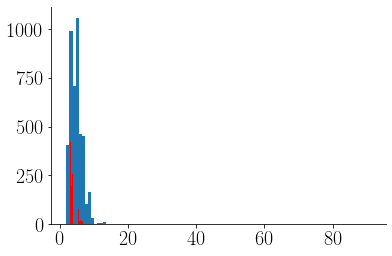

In [113]:
plt.hist(freqStim, bins =100);
plt.hist(freqRes, bins =100, color = 'red');

In [114]:
freqStim.mean(), freqRes.mean()

(4.735909090909091, 3.272872186262197)

In [115]:

powerStim = np.array(powerStim)
powerRes = np.array(powerRes)


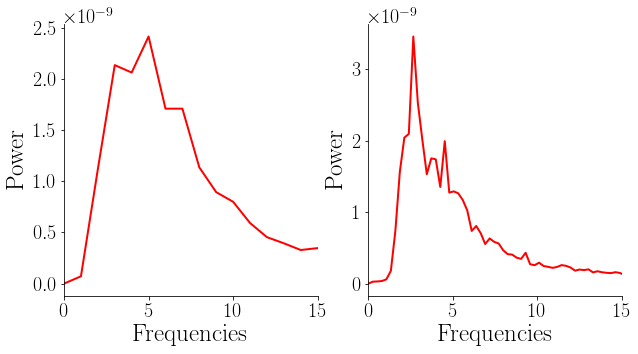

In [116]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,2,1)
ax.plot(xS, np.mean(powerStim,0), 'red', lw = 2)
ax.set_xlim(0,15)
ax.set_ylabel('Power')
ax.set_xlabel('Frequencies');

ax = fig.add_subplot(1,2,2)
ax.plot(xR, np.mean(powerRes,0), 'red', lw = 2)
ax.set_xlim(0,15)
ax.set_ylabel('Power')
ax.set_xlabel('Frequencies');

Four dominant frequencies: 4.0 18.0 24.0 30.0 Hz


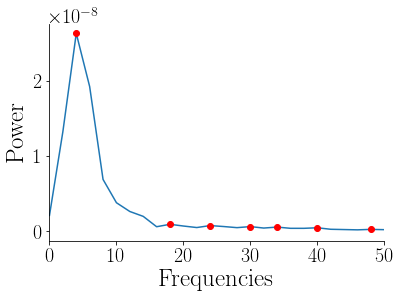

In [118]:
y = timeseries[0,:1000,80]

f, Pxx_den = signal.welch(y, fs = 1/0.001, nperseg = 500,scaling = "spectrum")

peaks = R_helper_detector(Pxx_den)
sort = np.sort(peaks[:,1])[::-1]

print('Four dominant frequencies: %.1f %.1f %.1f %.1f Hz' %(f[Pxx_den.tolist().index(sort[0])],f[Pxx_den.tolist().index(sort[1])],f[Pxx_den.tolist().index(sort[2])],f[Pxx_den.tolist().index(sort[3])]))
plt.plot(f,Pxx_den)
plt.plot(f[np.array(peaks[:,0], dtype = int)], peaks[:,1], 'ro')
plt.xlim(0,50);
plt.xlabel('Hz');
plt.xlabel('Frequencies')
plt.ylabel('Power');

## another rat

In [119]:
cd /home/benny/Desktop/altriDati/20181024_4x64/2s

/home/benny/Desktop/altriDati/20181024_4x64/2s


In [120]:
lista = np.sort(os.listdir())

In [121]:

timeseries =[]
for k in range(20):
    path = lista[k]
    width = 4    #columns
    heigth = 64   #rows
    nframes = 2000  #load  only some frames
    #n_words_to_load = heigth * width  * nframes
    n_words_to_load = -1  #load  all frames 
    raw = np.fromfile( path, dtype=np.double, count = n_words_to_load)  # count = -1 to load all data
    a = np.reshape(raw, (-1, width, heigth))
    a1 = []
    
    for z in range(9764):
        a1.append(np.delete(a[z],(0,1,2,3,4,5,6,7,8), axis = 1).transpose().tolist())
   
    a1 = np.asarray(a1)
    a1 = a1.reshape(-1,220)
    timeseries.append(a1)
    
                      
timeseries = np.array(timeseries)
timeseries[:,:,60] = np.mean(timeseries, axis = 2)

# Power spectrum <a id="powerspectrum"></a>

### EPRs

In [122]:
np.mean(timeseries,0).shape

(9764, 220)

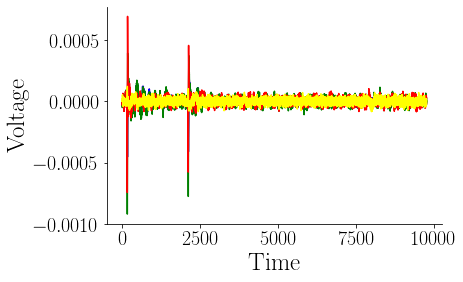

In [123]:
#plt.plot(np.mean(timeseries,0)[:,100], 'purple', lw = 1.5);

plt.plot(np.mean(timeseries,0)[:,61], 'purple', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,61], 'blue', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,131], 'green', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,200], 'red', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,10], 'yellow', lw = 1.5);
plt.ylabel('Voltage')
plt.xlabel('Time');

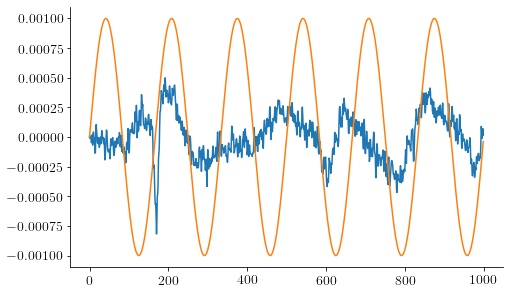

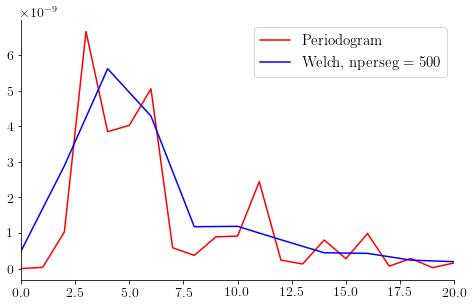

In [41]:
plt.plot(timeseries[0,:1000,70])

x = np.arange(0,1,0.001)
plt.plot(np.sin(x*2*np.pi*6)*10**-3)
sig = np.sin(x*2*np.pi*6)

sig2 = timeseries[0,:1000,70]
x, pxx = signal.periodogram(sig2, fs = 1/0.001)
plt.figure()
plt.plot(x,pxx, 'r-',label = 'Periodogram')


x, pxx = signal.welch(sig2, fs = 1/0.001,  nperseg = 500)

plt.plot(x,pxx, 'b-',label = 'Welch, nperseg = 500')
plt.xlim(0,20)
plt.legend()


In [125]:
powerStim = []
powerRes = []
xStim = []
freqStim =[]
freqRes = []
for s in range(20):
    for g in range(220):
        xS, pxx = signal.periodogram(timeseries[s,:1000,g], fs = 1/0.001)
        xStim.append(xS)
        peaks = R_helper_detector(pxx)
        sort = np.sort(peaks[:,1])[::-1]
        freqStim.append(xS[pxx.tolist().index(sort[0])])
        powerStim.append(pxx)
        
        xR, pxx = signal.periodogram(timeseries[s,6000:,g], fs = 1/0.001)
        powerRes.append(pxx)
                                                            
        peaks = R_helper_detector(pxx)
        sort = np.sort(peaks[:,1])[::-1]
        freqRes.append(xR[pxx.tolist().index(sort[0])])

In [126]:
freqStim = np.array(freqStim)
freqRes = np.array(freqRes)

(0.0, 20.0)

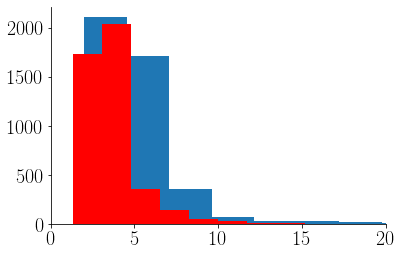

In [135]:
plt.hist(freqStim, bins =100);
plt.hist(freqRes, bins =100, color = 'red');
plt.xlim(0,20)

In [128]:
freqStim.mean(), freqRes.mean()

(5.610227272727273, 3.938206453482756)

In [136]:
powerStim = np.array(powerStim)
powerRes = np.array(powerRes)

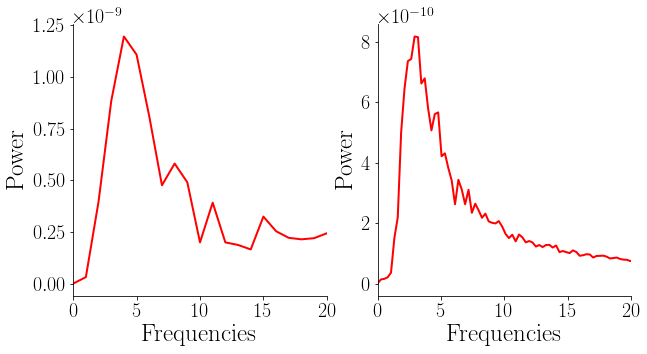

In [138]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,2,1)
ax.plot(xS, np.mean(powerStim,0), 'red', lw = 2)
ax.set_xlim(0,20)
ax.set_ylabel('Power')
ax.set_xlabel('Frequencies');

ax = fig.add_subplot(1,2,2)
ax.plot(xR, np.mean(powerRes,0), 'red', lw = 2)
ax.set_xlim(0,20)
ax.set_ylabel('Power')
ax.set_xlabel('Frequencies');

Four dominant frequencies: 4.0 38.0 28.0 20.0 Hz


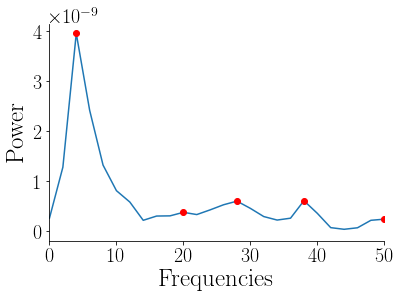

In [139]:
y = timeseries[0,:1000,80]

f, Pxx_den = signal.welch(y, fs = 1/0.001, nperseg = 500,scaling = "spectrum")

peaks = R_helper_detector(Pxx_den)
sort = np.sort(peaks[:,1])[::-1]

print('Four dominant frequencies: %.1f %.1f %.1f %.1f Hz' %(f[Pxx_den.tolist().index(sort[0])],f[Pxx_den.tolist().index(sort[1])],f[Pxx_den.tolist().index(sort[2])],f[Pxx_den.tolist().index(sort[3])]))
plt.plot(f,Pxx_den)
plt.plot(f[np.array(peaks[:,0], dtype = int)], peaks[:,1], 'ro')
plt.xlim(0,50);
plt.xlabel('Hz');
plt.xlabel('Frequencies')
plt.ylabel('Power');

## another rat

In [174]:
cd /home/benny/Desktop/altriDati/20181025_4x64/2s

/home/benny/Desktop/altriDati/20181025_4x64/2s


In [175]:
lista = np.sort(os.listdir())

In [176]:

timeseries =[]
for k in range(20):
    path = lista[k]
    width = 4    #columns
    heigth = 64   #rows
    nframes = 2000  #load  only some frames
    #n_words_to_load = heigth * width  * nframes
    n_words_to_load = -1  #load  all frames 
    raw = np.fromfile( path, dtype=np.double, count = n_words_to_load)  # count = -1 to load all data
    a = np.reshape(raw, (-1, width, heigth))
    a1 = []
    
    for z in range(9764):
        a1.append(np.delete(a[z],(0,1,2,3,4,5,6,7,8), axis = 1).transpose().tolist())
   
    a1 = np.asarray(a1)
    a1 = a1.reshape(-1,220)
    timeseries.append(a1)
    
                      
timeseries = np.array(timeseries)
timeseries[:,:,60] = np.mean(timeseries, axis = 2)

# Power spectrum <a id="powerspectrum"></a>

### EPRs

In [177]:
np.mean(timeseries,0).shape

(9764, 220)

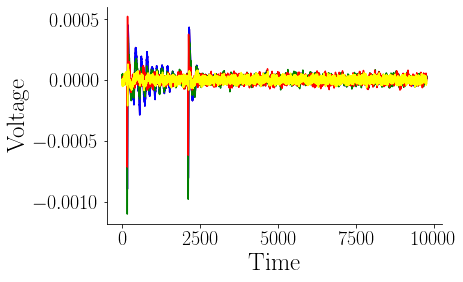

In [178]:
#plt.plot(np.mean(timeseries,0)[:,100], 'purple', lw = 1.5);

plt.plot(np.mean(timeseries,0)[:,61], 'purple', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,61], 'blue', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,131], 'green', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,200], 'red', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,10], 'yellow', lw = 1.5);
plt.ylabel('Voltage')
plt.xlabel('Time');

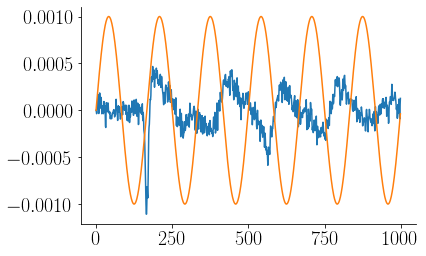

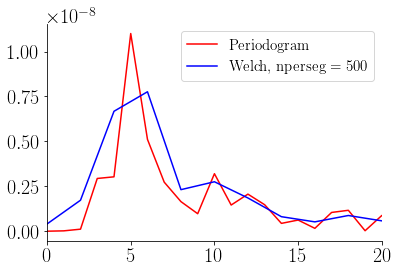

In [194]:
plt.plot(timeseries[0,:1000,70])

x = np.arange(0,1,0.001)
plt.plot(np.sin(x*2*np.pi*6)*10**-3)
sig = np.sin(x*2*np.pi*6)

sig2 = timeseries[0,:1000,80]
x, pxx = signal.periodogram(sig2, fs = 1/0.001)
plt.figure()
plt.plot(x,pxx, 'r-',label = 'Periodogram')


x, pxx = signal.welch(sig2, fs = 1/0.001,  nperseg = 500)

plt.plot(x,pxx, 'b-',label = 'Welch, nperseg = 500')
plt.xlim(0,20)
plt.legend()


In [189]:
powerStim = []
powerRes = []
xStim = []
freqStim =[]
freqRes = []
for s in range(20):
    for g in range(55,70): # select only some channels
        xS, pxx = signal.periodogram(timeseries[s,:1000,g], fs = 1/0.001)
        xStim.append(xS)
        peaks = R_helper_detector(pxx)
        sort = np.sort(peaks[:,1])[::-1]
        freqStim.append(xS[pxx.tolist().index(sort[0])])
        powerStim.append(pxx)
        
        xR, pxx = signal.periodogram(timeseries[s,6000:,g], fs = 1/0.001)
        powerRes.append(pxx)
                                                            
        peaks = R_helper_detector(pxx)
        sort = np.sort(peaks[:,1])[::-1]
        freqRes.append(xR[pxx.tolist().index(sort[0])])

In [190]:
freqStim = np.array(freqStim)
freqRes = np.array(freqRes)

(0.0, 20.0)

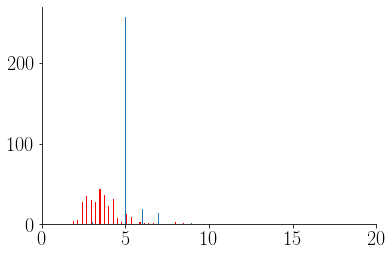

In [191]:
plt.hist(freqStim, bins =100);
plt.hist(freqRes, bins =100, color = 'red');
plt.xlim(0,20)

In [192]:
freqStim.mean(), freqRes.mean() # 5 hz rensponse

(5.13, 3.55118668083599)

In [149]:
freqStim.mean(), freqRes.mean()

(5.033636363636363, 3.438798183750362)

In [150]:
powerStim = np.array(powerStim)
powerRes = np.array(powerRes)

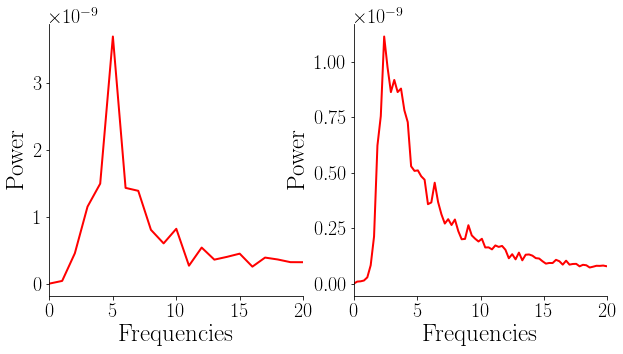

In [151]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,2,1)
ax.plot(xS, np.mean(powerStim,0), 'red', lw = 2)
ax.set_xlim(0,20)
ax.set_ylabel('Power')
ax.set_xlabel('Frequencies');

ax = fig.add_subplot(1,2,2)
ax.plot(xR, np.mean(powerRes,0), 'red', lw = 2)
ax.set_xlim(0,20)
ax.set_ylabel('Power')
ax.set_xlabel('Frequencies');

Four dominant frequencies: 6.0 18.0 28.0 34.0 Hz


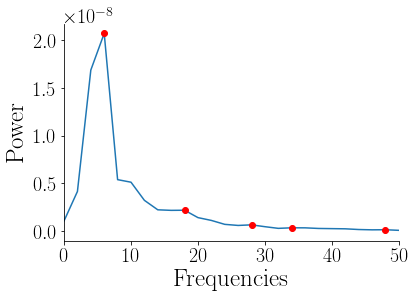

In [153]:
y = timeseries[0,:1000,61]

f, Pxx_den = signal.welch(y, fs = 1/0.001, nperseg = 500,scaling = "spectrum")

peaks = R_helper_detector(Pxx_den)
sort = np.sort(peaks[:,1])[::-1]

print('Four dominant frequencies: %.1f %.1f %.1f %.1f Hz' %(f[Pxx_den.tolist().index(sort[0])],f[Pxx_den.tolist().index(sort[1])],f[Pxx_den.tolist().index(sort[2])],f[Pxx_den.tolist().index(sort[3])]))
plt.plot(f,Pxx_den)
plt.plot(f[np.array(peaks[:,0], dtype = int)], peaks[:,1], 'ro')
plt.xlim(0,50);
plt.xlabel('Hz');
plt.xlabel('Frequencies')
plt.ylabel('Power');

## First rat

In [156]:
cd /home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s/

/home/benny/Desktop/Benedetta/20180530_4x64/ISI_2s


In [157]:
lista = np.sort(os.listdir())
lista

array(['ISI_2s_1st_pyton_sf976.5625_001.bin',
       'ISI_2s_1st_pyton_sf976.5625_002.bin',
       'ISI_2s_1st_pyton_sf976.5625_003.bin',
       'ISI_2s_1st_pyton_sf976.5625_004.bin',
       'ISI_2s_1st_pyton_sf976.5625_005.bin',
       'ISI_2s_1st_pyton_sf976.5625_006.bin',
       'ISI_2s_1st_pyton_sf976.5625_007.bin',
       'ISI_2s_1st_pyton_sf976.5625_008.bin',
       'ISI_2s_1st_pyton_sf976.5625_009.bin',
       'ISI_2s_1st_pyton_sf976.5625_010.bin',
       'ISI_2s_1st_pyton_sf976.5625_011.bin',
       'ISI_2s_1st_pyton_sf976.5625_012.bin',
       'ISI_2s_1st_pyton_sf976.5625_013.bin',
       'ISI_2s_1st_pyton_sf976.5625_014.bin',
       'ISI_2s_1st_pyton_sf976.5625_015.bin',
       'ISI_2s_1st_pyton_sf976.5625_016.bin',
       'ISI_2s_1st_pyton_sf976.5625_017.bin',
       'ISI_2s_1st_pyton_sf976.5625_018.bin',
       'ISI_2s_1st_pyton_sf976.5625_019.bin',
       'ISI_2s_1st_pyton_sf976.5625_020.bin'], dtype='<U35')

In [158]:

timeseries =[]
for k in range(20):
    path = lista[k]
    width = 4    #columns
    heigth = 64   #rows
    nframes = 2000  #load  only some frames
    #n_words_to_load = heigth * width  * nframes
    n_words_to_load = -1  #load  all frames 
    raw = np.fromfile( path, dtype=np.double, count = n_words_to_load)  # count = -1 to load all data
    a = np.reshape(raw, (-1, width, heigth))
    a1 = []
    
    for z in range(9764):
        a1.append(np.delete(a[z],(0,1,2,3,4,5,6,7,8), axis = 1).transpose().tolist())
   
    a1 = np.asarray(a1)
    a1 = a1.reshape(-1,220)
    timeseries.append(a1)
    
                      
timeseries = np.array(timeseries)
timeseries[:,:,60] = np.mean(timeseries, axis = 2)

# Power spectrum <a id="powerspectrum"></a>

### EPRs

In [159]:
np.mean(timeseries,0).shape

(9764, 220)

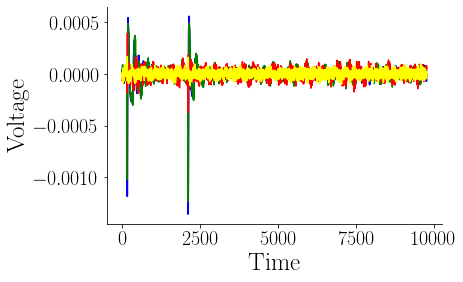

In [160]:
#plt.plot(np.mean(timeseries,0)[:,100], 'purple', lw = 1.5);

plt.plot(np.mean(timeseries,0)[:,61], 'purple', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,61], 'blue', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,131], 'green', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,200], 'red', lw = 1.5);
plt.plot(np.mean(timeseries,0)[:,10], 'yellow', lw = 1.5);
plt.ylabel('Voltage')
plt.xlabel('Time');

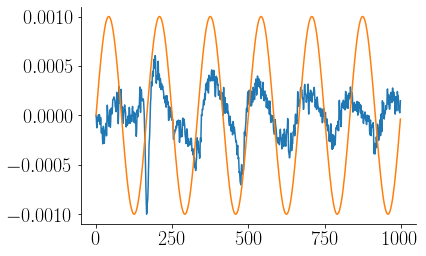

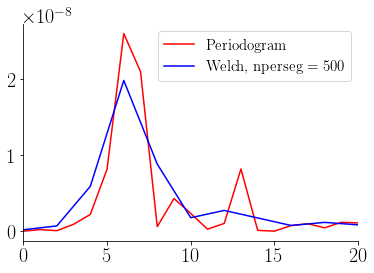

In [161]:
plt.plot(timeseries[0,:1000,70])

x = np.arange(0,1,0.001)
plt.plot(np.sin(x*2*np.pi*6)*10**-3)
sig = np.sin(x*2*np.pi*6)

sig2 = timeseries[0,:1000,80]
x, pxx = signal.periodogram(sig2, fs = 1/0.001)
plt.figure()
plt.plot(x,pxx, 'r-',label = 'Periodogram')


x, pxx = signal.welch(sig2, fs = 1/0.001,  nperseg = 500)

plt.plot(x,pxx, 'b-',label = 'Welch, nperseg = 500')
plt.xlim(0,20)
plt.legend()


In [162]:
powerStim = []
powerRes = []
xStim = []
freqStim =[]
freqRes = []
for s in range(20):
    for g in range(220):
        xS, pxx = signal.periodogram(timeseries[s,:1000,g], fs = 1/0.001)
        xStim.append(xS)
        peaks = R_helper_detector(pxx)
        sort = np.sort(peaks[:,1])[::-1]
        freqStim.append(xS[pxx.tolist().index(sort[0])])
        powerStim.append(pxx)
        
        xR, pxx = signal.periodogram(timeseries[s,6000:,g], fs = 1/0.001)
        powerRes.append(pxx)
                                                            
        peaks = R_helper_detector(pxx)
        sort = np.sort(peaks[:,1])[::-1]
        freqRes.append(xR[pxx.tolist().index(sort[0])])

In [163]:
freqStim = np.array(freqStim)
freqRes = np.array(freqRes)

(0.0, 20.0)

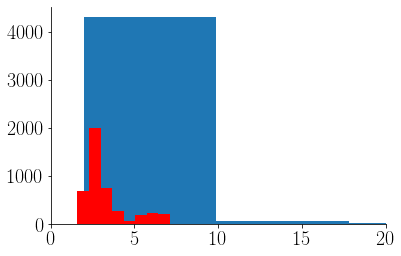

In [169]:
plt.hist(freqStim, bins =30);
plt.hist(freqRes, bins =20, color = 'red');
plt.xlim(0,20)

In [170]:
freqStim.mean(), freqRes.mean()

(5.6468181818181815, 3.2634528064921255)

In [171]:
powerStim = np.array(powerStim)
powerRes = np.array(powerRes)

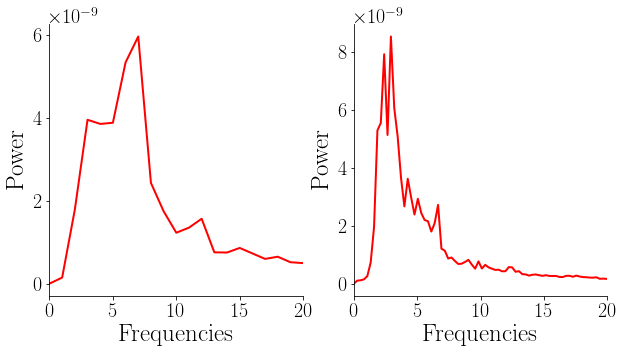

In [172]:
fig = plt.figure(figsize = (10,5))
ax = fig.add_subplot(1,2,1)
ax.plot(xS, np.mean(powerStim,0), 'red', lw = 2)
ax.set_xlim(0,20)
ax.set_ylabel('Power')
ax.set_xlabel('Frequencies');

ax = fig.add_subplot(1,2,2)
ax.plot(xR, np.mean(powerRes,0), 'red', lw = 2)
ax.set_xlim(0,20)
ax.set_ylabel('Power')
ax.set_xlabel('Frequencies');

Four dominant frequencies: 6.0 12.0 18.0 24.0 Hz


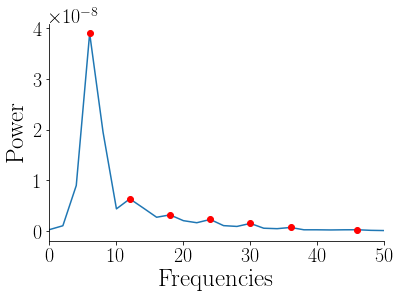

In [173]:
y = timeseries[0,:1000,61]

f, Pxx_den = signal.welch(y, fs = 1/0.001, nperseg = 500,scaling = "spectrum")

peaks = R_helper_detector(Pxx_den)
sort = np.sort(peaks[:,1])[::-1]

print('Four dominant frequencies: %.1f %.1f %.1f %.1f Hz' %(f[Pxx_den.tolist().index(sort[0])],f[Pxx_den.tolist().index(sort[1])],f[Pxx_den.tolist().index(sort[2])],f[Pxx_den.tolist().index(sort[3])]))
plt.plot(f,Pxx_den)
plt.plot(f[np.array(peaks[:,0], dtype = int)], peaks[:,1], 'ro')
plt.xlim(0,50);
plt.xlabel('Hz');
plt.xlabel('Frequencies')
plt.ylabel('Power');